# Telecom Churn Prediction using Logistic Legression

- ## Import required libraries

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

- ## Load Dataset

In [19]:
data = pd.read_csv('Telecom-Churn.csv')

In [20]:
data.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


- ## Data Preprocessing

In [21]:
data.shape

(2666, 20)

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   2666 non-null   object 
 1   Account length          2666 non-null   int64  
 2   Area code               2666 non-null   int64  
 3   International plan      2666 non-null   object 
 4   Voice mail plan         2666 non-null   object 
 5   Number vmail messages   2666 non-null   int64  
 6   Total day minutes       2666 non-null   float64
 7   Total day calls         2666 non-null   int64  
 8   Total day charge        2666 non-null   float64
 9   Total eve minutes       2666 non-null   float64
 10  Total eve calls         2666 non-null   int64  
 11  Total eve charge        2666 non-null   float64
 12  Total night minutes     2666 non-null   float64
 13  Total night calls       2666 non-null   int64  
 14  Total night charge      2666 non-null   

In [23]:
data.isnull().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

In [24]:
data.nunique()

State                       51
Account length             205
Area code                    3
International plan           2
Voice mail plan              2
Number vmail messages       42
Total day minutes         1489
Total day calls            115
Total day charge          1489
Total eve minutes         1442
Total eve calls            120
Total eve charge          1301
Total night minutes       1444
Total night calls          118
Total night charge         885
Total intl minutes         158
Total intl calls            21
Total intl charge          158
Customer service calls      10
Churn                        2
dtype: int64

- ## Drop irrelevant Columns

In [25]:
data = data.drop(['State', 'Area code'], axis=1)

- ## Convert categorical variables to numerical

In [26]:
data['International plan']= data['International plan'].map({'Yes':1, 'No':0})
data['Voice mail plan']= data['Voice mail plan'].map({'Yes':1, 'No':0})

In [27]:
data

,Account length,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,128,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,107,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,137,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,84,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,75,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2661,79,0,0,0,134.7,98,22.90,189.7,68,16.12,221.4,128,9.96,11.8,5,3.19,2,False
2662,192,0,1,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
2663,68,0,0,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
2664,28,0,0,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False


- ## Check Correalation matrix

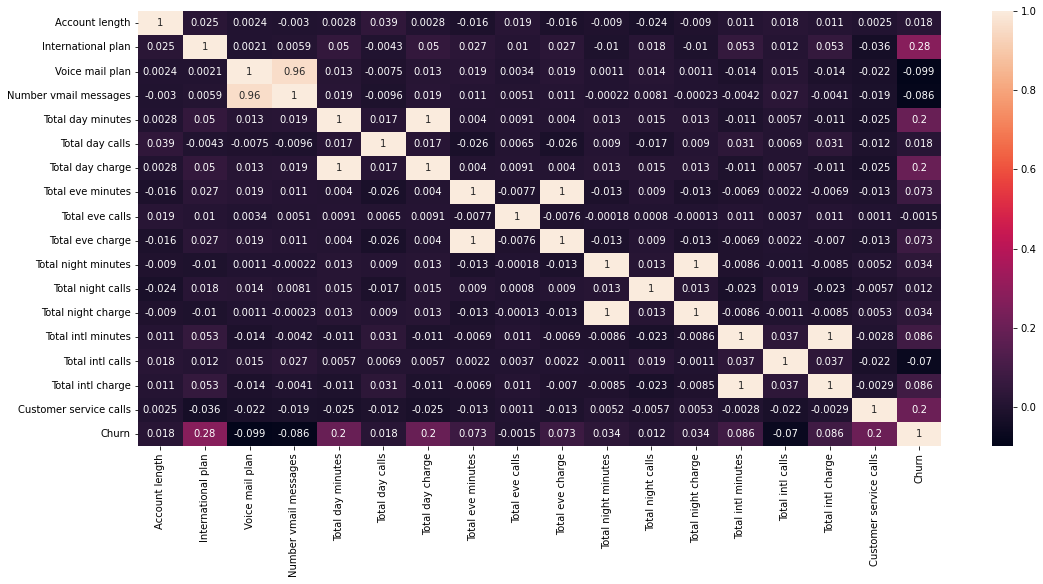

In [28]:
correlation = data.corr()
plt.figure(figsize=(18,8))
sns.heatmap(data=correlation,annot=True)
plt.show()

- ## Define features and target variable

In [29]:
X= data.drop(['Churn'],axis=1)
y= data['Churn']

- ## Split Dataset into training and test sets

In [30]:
X_train,X_test,y_train,y_test= train_test_split(X,y, test_size=0.3, random_state= 42)

- ## Train Logistic Regression Model

In [35]:
model= LogisticRegression()
model.fit(X_train,y_train)

C:\Users\91701\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

- ## Make predictions on the test set

In [ ]:
y_pred=model.predict(X_test)

- ## Evaluation

In [36]:
accuracy = accuracy_score(y_test,y_pred)
classification_Report= classification_report(y_test, y_pred)

In [38]:
print("Accuracy Score: ",accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy Score:  0.8520599250936329

Classification Report:
               precision    recall  f1-score   support

       False       0.86      0.99      0.92       455
        True       0.50      0.08      0.13        79

    accuracy                           0.85       534
   macro avg       0.68      0.53      0.53       534
weighted avg       0.81      0.85      0.80       534



In [41]:
X_test

,Account length,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
2087,115,1,0,0,345.3,81,58.70,203.4,106,17.29,217.5,107,9.79,11.8,8,3.19,1
1915,157,1,0,0,180.4,123,30.67,194.0,98,16.49,227.3,88,10.23,8.4,5,2.27,0
479,84,0,0,0,159.0,80,27.03,167.9,128,14.27,167.6,101,7.54,12.3,5,3.32,1
1898,105,0,0,0,273.8,97,46.55,289.7,106,24.62,269.1,126,12.11,5.8,3,1.57,2
741,74,1,0,0,125.8,103,21.39,207.7,96,17.65,207.4,143,9.33,14.1,4,3.81,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1196,70,0,0,0,197.3,91,33.54,305.8,81,25.99,171.0,105,7.69,6.7,6,1.81,1
958,131,0,1,28,249.6,87,42.43,227.2,138,19.31,239.9,92,10.80,7.6,3,2.05,3
861,131,0,0,0,153.4,86,26.08,198.5,81,16.87,164.4,83,7.40,10.4,3,2.81,0
1510,91,0,1,39,169.8,105,28.87,65.2,116,5.54,144.4,92,6.50,10.9,4,2.94,1


In [70]:
Sample_data= {
    'Account length': 19,
    'International plan': 1,    # 1 for Yes, 0 for No
    'Voice mail plan': 0,       # 1 for Yes, 0 for No
    'Number vmail messages': 30,
    'Total day minutes': 157.3,
    'Total day calls': 100,
    'Total day charge': 55.5,
    'Total eve minutes': 200.06,
    'Total eve calls': 56,
    'Total eve charge': 15.04,
    'Total night minutes': 280.36,
    'Total night calls': 110,
    'Total night charge': 90.25,
    'Total intl minutes': 14.3,
    'Total intl calls': 10,
    'Total intl charge': 5.08,
    'Customer service calls': 8
}

sample= pd.DataFrame([Sample_data])

In [71]:
prediction=model.predict(sample)
if prediction== True:
    print("Result: 'This customer will leave our network'")
else:
    print("Result: 'This customer will stay with our network'")

Result: 'This customer will leave our network'
